## Keras and TensorFlow

In this assignment, we will learn about Keras and TensorFlow. We will create a neural network and measure the model's performance.

In [1]:
import numpy as np
import pandas as pd

In [2]:
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast_cancer.csv')

In [3]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We'll start with some data cleaning. First remove the id column since we have no use for it. Then check for missing data and remove all rows containing missing data.

In [4]:
# Answer below:
cancer2 = cancer.drop('id',axis=1)

cancer2.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

The diagnosis columnn is our target variable. How many possible values are in this variable?

In [5]:
# Answer below:
cancer2['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

Create one or multiple dummy variables for this column and store this encoded data in a numpy array called `target`

In [6]:
# Answer below:
cancer3 = pd.get_dummies(data=cancer2,columns=['diagnosis'], drop_first=True)

cancer3.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [7]:
target_df = cancer3['diagnosis_M']
target_df

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_M, Length: 569, dtype: uint8

In [8]:
target = np.array(cancer3['diagnosis_M'])
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

When looking at the columm names, you may have noticed that for each attribute we have a mean of the attribute, a standard error, and a worst value. Let's create a list of column names for only the means columns. Use this list to create a new dataframe containing only the means columns.

In [9]:
# Answer below:
cancer4 = cancer3.filter(like='mean', axis=1)
cancer4.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Split the data into train and test samples. The test sample should contain 20% of the data.

In [10]:
# Answer below
from sklearn.model_selection import train_test_split

X = cancer4
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Now we'll use the minmax scaler to ensure that all columns have values between zero and 1. Apply this transformations for all columns to be used in the prediction.

In [11]:
# Answer below:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)


In [12]:
X_train_scale.shape

(455, 10)

Now we can proceed with our model. In the cell below, import the `Sequential`, and `Dense` functions.

In [13]:
# Answer below:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

create a model that takes the training data and predicts the target variable. The model will have 3 layers. The input layer should be of unit size 12 and the hidden layer will be of size 10. The output layer size will be determined by the size of the target variable. Use the sigmoid activation function for the last layer

In [14]:
# Answer below
model = Sequential()
#first layer
model.add(Dense(12, input_dim=X_train_scale.shape[1] ,activation='relu'))
#second layer
model.add(Dense(10 ,activation='relu'))
#third layer/output layer
model.add(Dense(1 ,activation='sigmoid'))

In [15]:
# Answer below:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


Compile and fit the model. Use the adam optimizer and the binary crossentropy loss function. Train the model for 200 epochs with a batch size of 80. Make sure to use the test data into the model as well.

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

In [17]:
# Answer below:
history = model.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), batch_size=80, epochs=200, verbose=2)

Epoch 1/200
6/6 - 1s - loss: 0.7046 - accuracy: 0.6264 - val_loss: 0.6980 - val_accuracy: 0.6316
Epoch 2/200
6/6 - 0s - loss: 0.6940 - accuracy: 0.6264 - val_loss: 0.6880 - val_accuracy: 0.6316
Epoch 3/200
6/6 - 0s - loss: 0.6848 - accuracy: 0.6264 - val_loss: 0.6789 - val_accuracy: 0.6404
Epoch 4/200
6/6 - 0s - loss: 0.6770 - accuracy: 0.6264 - val_loss: 0.6706 - val_accuracy: 0.6491
Epoch 5/200
6/6 - 0s - loss: 0.6695 - accuracy: 0.6286 - val_loss: 0.6631 - val_accuracy: 0.6667
Epoch 6/200
6/6 - 0s - loss: 0.6622 - accuracy: 0.6352 - val_loss: 0.6559 - val_accuracy: 0.6667
Epoch 7/200
6/6 - 0s - loss: 0.6549 - accuracy: 0.6593 - val_loss: 0.6485 - val_accuracy: 0.6930
Epoch 8/200
6/6 - 0s - loss: 0.6476 - accuracy: 0.6725 - val_loss: 0.6409 - val_accuracy: 0.7193
Epoch 9/200
6/6 - 0s - loss: 0.6400 - accuracy: 0.6967 - val_loss: 0.6333 - val_accuracy: 0.7544
Epoch 10/200
6/6 - 0s - loss: 0.6324 - accuracy: 0.7121 - val_loss: 0.6255 - val_accuracy: 0.7719
Epoch 11/200
6/6 - 0s - loss:

In [18]:
model_df = pd.DataFrame(history.history)
model_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.704564,0.626374,0.697970,0.631579
1,0.693954,0.626374,0.687951,0.631579
2,0.684821,0.626374,0.678859,0.640351
3,0.677042,0.626374,0.670593,0.649123
4,0.669485,0.628571,0.663078,0.666667


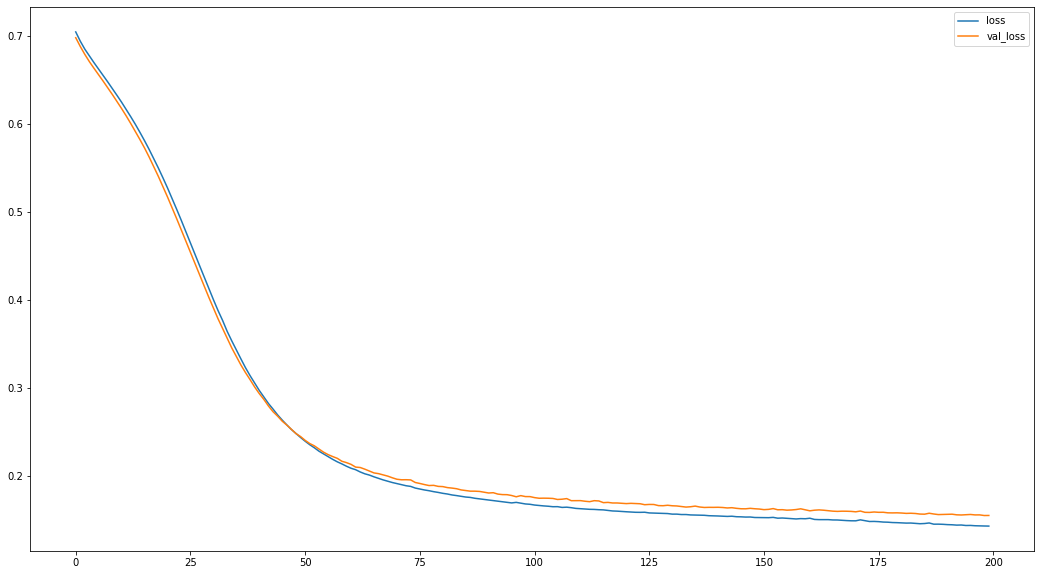

In [19]:
model_df[['loss', 'val_loss']].plot(figsize=(18,10))

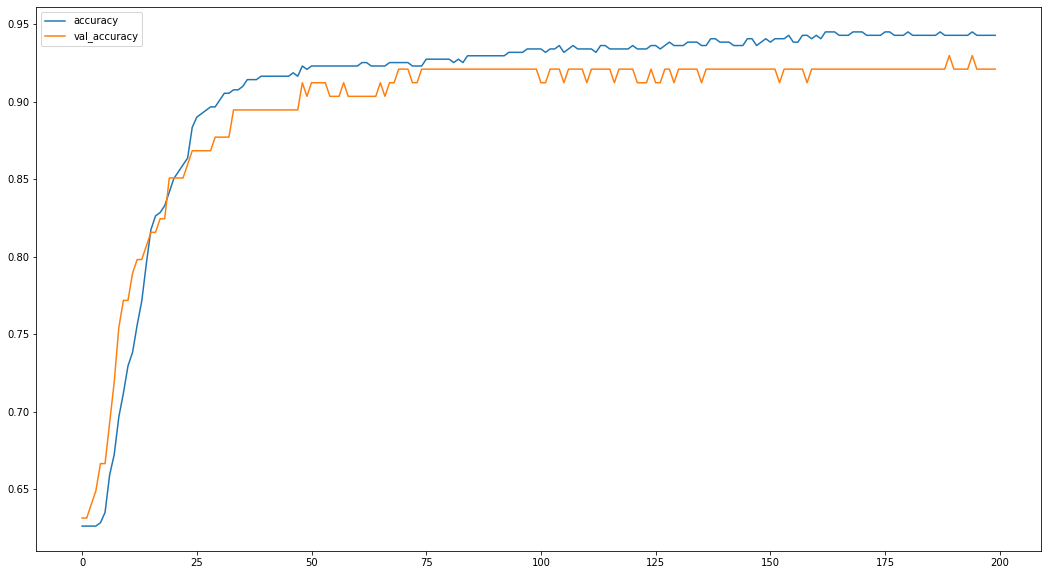

In [20]:
model_df[['accuracy', 'val_accuracy']].plot(figsize=(18,10))

Report the accuracy of the test sample.

In [37]:
results = model.evaluate(X_test_scale, y_test, verbose=0)
print("loss: ", round(results[0],6))
print("accuracy: ", round(results[1],6))

loss:  0.15525
accuracy:  0.921053
